### SIMPLE LINEAR REGRESSION 

#### Data ingestion 

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
path = r"C:\Users\aspire\OneDrive\Desktop\Data Science\Machine Learning\Data set\50_Startups.csv"

In [4]:
df = pd.read_csv(path)

Basic checks 

In [5]:
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
df.tail()

,RND,ADMIN,MKT,STATE,PROFIT
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [9]:
df.shape

(50, 5)

In [10]:
df.columns

Index(['RND', 'ADMIN', 'MKT', 'STATE', 'PROFIT'], dtype='object')

# Basic quality checks 

### - duplicates
### - null

In [12]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='RND', ylabel='PROFIT'>

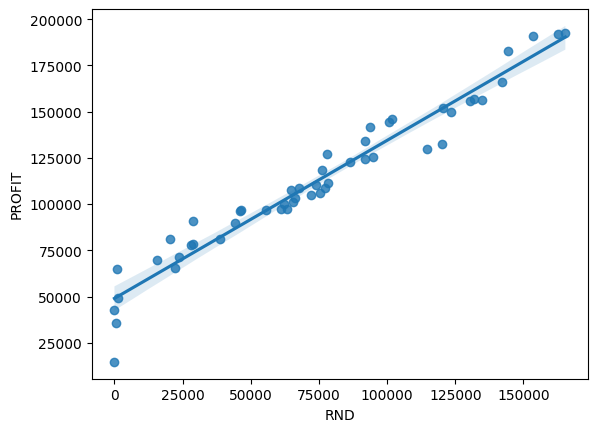

In [17]:
sns.regplot(df, x = "RND", y = "PROFIT")

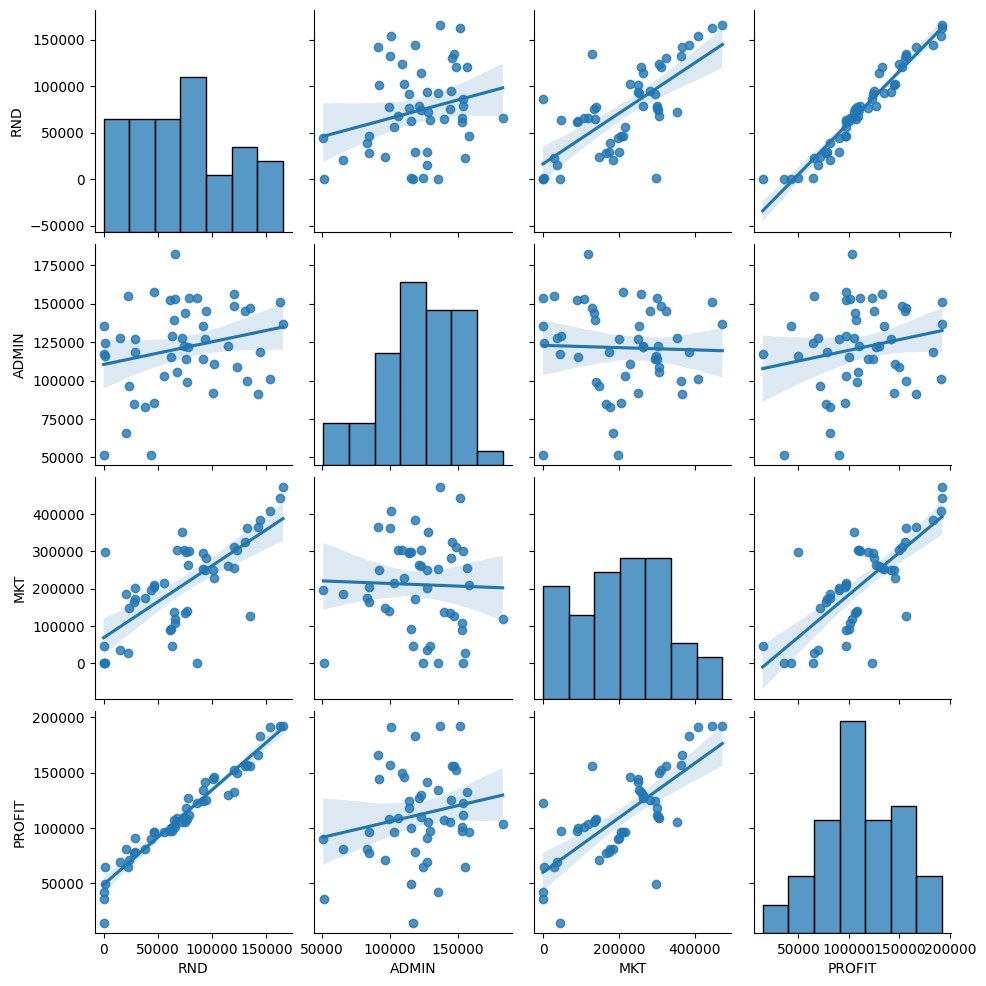

In [18]:
sns.pairplot(df, kind = 'reg')

In [36]:
df.corr(numeric_only = True)

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


# seperate x and y 

In [21]:
# USE DOUBLE SQUARE BRACKET FOR DATA FRAME 

x = df[["RND"]]
y = df[["PROFIT"]]

In [22]:
x.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [23]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [24]:
# TRAIN TEST SPLIT 

from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 34)

In [28]:
x_train.head()

,RND
28,66051.52
6,134615.46
9,123334.88
37,44069.95
48,542.05


In [29]:
y_train.head()

,PROFIT
28,103282.38
6,156122.51
9,149759.96
37,89949.14
48,35673.41


In [31]:
x_train.shape

(42, 1)

In [52]:
print(y_train.head())
print(y_train.shape)
print(y_test.head())
print(y_test.shape)

       PROFIT
28  103282.38
6   156122.51
9   149759.96
37   89949.14
48   35673.41
(42, 1)
       PROFIT
16  126992.93
39   81005.76
1   191792.06
3   182901.99
0   192261.83
(8, 1)


FIT MODEL

In [37]:
from sklearn.linear_model import LinearRegression

In [39]:
model = LinearRegression()

In [40]:
model.fit(x_train, y_train)

LinearRegression()

CHECK SCORE

In [42]:
# Training score

model.score(x_train, y_train)

0.9326516494068815

In [43]:
# Testing score
model.score(x_test, y_test)

0.9530376889602263

In [55]:
from sklearn.metrics import mean_squared_error, \
root_mean_squared_error, mean_absolute_percentage_error, r2_score

In [58]:
y_test_pred = model.predict(x_test)
y_test_pred

array([[114672.93086039],
       [ 81799.99011792],
       [185147.45638583],
       [169962.43668764],
       [187439.96211274],
       [158235.97203123],
       [101326.46492827],
       [127879.43021535]])

In [59]:
y_train_pred = model.predict(x_train)
y_train_pred

array([[104706.72567124],
       [161833.10223292],
       [152434.30366746],
       [ 86392.03364455],
       [ 50125.28458755],
       [ 49673.65721002],
       [111324.73936889],
       [128540.48671863],
       [ 49673.65721002],
       [177518.66554023],
       [ 50507.0328245 ],
       [105940.67948066],
       [113865.49226328],
       [112436.46508812],
       [ 88355.11508859],
       [126320.2430385 ],
       [134586.00303846],
       [145092.89464099],
       [109752.55452191],
       [150107.75404304],
       [ 73555.84291046],
       [ 50769.67741119],
       [100611.50975318],
       [121677.16699296],
       [ 68151.7949385 ],
       [ 62592.7830777 ],
       [102504.90368895],
       [113207.15193978],
       [ 66528.62756366],
       [103551.25779295],
       [ 73631.30438372],
       [126117.58769852],
       [104335.09228784],
       [149608.44354621],
       [133551.92173452],
       [159551.37790674],
       [ 88011.80162874],
       [168075.21664517],
       [1149

In [60]:
# create function evaluate

def evaluate(model  ,  x, y):
    y_pred  =  model.predict(x)
    MSE  =  mean_squared_error(y ,  y_pred)
    MAE  =  mean_absolute_error(y , y_pred)
    RMSE  =  root_mean_squared_error(y , y_pred)
    r2_score_ =  r2_score(y , y_pred)
    MAPE  =  mean_absolute_percentage_error(y , y_pred)
 
 
 
    print(f"MSE -->{MSE}")
    print(f"RMSE -->{RMSE}")
    print(f"MAPE -->{MAPE}")
    print(f"MAE -->{MAE}")
    print(f"r2_score_ -->{r2_score_}")
 
 
 
from  sklearn.metrics  import (mean_squared_error ,
                root_mean_squared_error ,  
                mean_absolute_percentage_error ,mean_absolute_error ,
                r2_score)
 

In [62]:
# training evaluation
train_evaluation =  evaluate(model ,  x_train  , y_train )
train_evaluation

MSE -->89541295.94110882
RMSE -->9462.626270814504
MAPE -->0.12394670547809616
MAE -->6913.799287679005
r2_score_ -->0.9326516494068815


In [63]:

test_evaluation  =evaluate(model  , x_test  , y_test)

MSE -->72899924.33899671
RMSE -->8538.145251692355
MAPE -->0.04549178956093779
MAE -->6887.323851932748
r2_score_ -->0.9530376889602263


In [64]:
rnd  =  30000
model.predict([[rnd]])

c:\Users\aspire\OneDrive\Desktop\Data Science\ML\repository\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[74669.17667478]])

In [65]:
rnd  =  45000
model.predict([[rnd]])

c:\Users\aspire\OneDrive\Desktop\Data Science\ML\repository\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[87166.93640715]])